# Questão 3

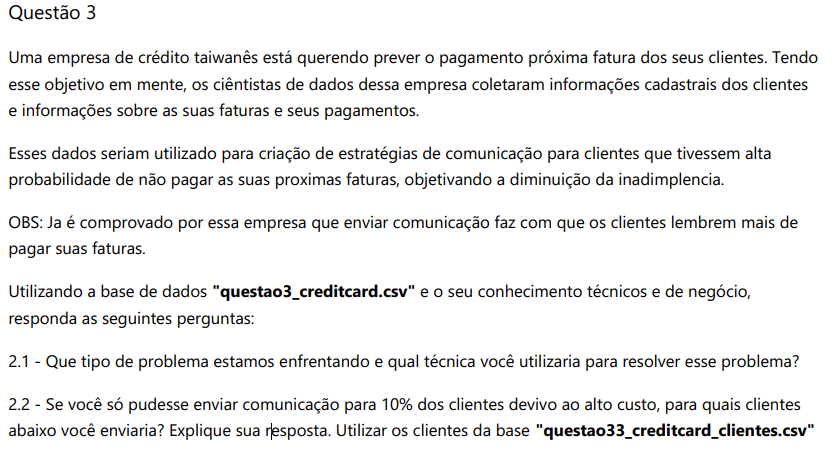

In [1]:
from IPython.display import Image
Image("questao3_enunciado.png")

## Questão 3 - Item 2.1

Ao observar o arquivo **questao3_creditcard**,  nota-se que se trata de um conjunto de dados rotulados. Esse conjunto é composto por uma amostra (que representa um cliente) e suas características (Idade, sexo, estado civil e outras). Cada amostra contém seu rótulo que indica se este cliente vai ou não pagar a próxima fatura. Tendo em vista que se busca identificar, ou classificar, clientes com maior probabilidade de não pagar a próxima fatura, o problema proposto é o de classificação binária entre os bons e os maus pagadores.

Para este tipo de problema, e tendo em vista os dados disponíveis, deve-se utilizar um algoritmo de classificação supervisionado. Estes algoritmos vão utilizar dos rótulos já conhecidos para treinar seus métodos de classificação e desta forma aprimorar sua capacidade de separar cada um dos grupos aprendendo a relação entre características da amostra e seu rótulo.

## Questão 3 - Item 2.2

Para visualizar os clientes que devem receber comunicação acessar o arquivo **clientes_cobrar** disponível na mesma pasta deste arquivo.

A estratégia utilizada para determinar estes clientes está detalhada abaixo.

Ela se baseia no uso de modelos de aprendizado de máquina capazes de realizar classificação de amostras. Foram utilizados três modelos: LogisticRegression, DecisionTreeClassifier e RandomForestClassifier. A escolha destes se deu devido ao seu amplo uso e já conhecida efetividade para a tarefa de classificação.

Os modelos tiveram seus parâmetros escolhidos através de validação cruzada. A validação cruzada realiza diversas vezes o ciclo de treino e teste do modelo com parâmetros que se deseja avaliar, além de variar os dados que são utilizados para treino/teste. Assim, a validação cruzada determina, entre os parâmetros utilizados, aqueles que apresenta melhor resultado.

Além disso, foi avaliada a estratégia de Padronização dos dados e de Redução de características.

A Padronização consiste em dividir cada amostra pela média e dividir pelo desvio padrão dos dados. Isso faz com que os dados fiquem todos com a mesma escala de magnitude, pois todas as características estarão centralizadas no zero com desvio padrão unitário.

A Redução de características, aqui realizada através da Análise de Componentes Principais ou Principal Component Analysis (PCA), é um método de redução de dimensionalidade que costuma ser usado para reduzir a dimensionalidade de grandes conjuntos de dados, transformando um grande conjunto de variáveis em um menor que ainda contém a maior parte das informações do grande conjunto. Embora estes métodos possam reduzir a acurácia do modelo, estes podem simplificar o modelo utilizado.


### Escolha do Modelo

Ao fim dos testes com diversos parâmetros os modelos são avaliados através de três parâmetros:  Acurácia, Recall e AUC. Estes são escolhidos pois é preciso reduzir o número de Falsos-Negativos, que são valores negativos classificados como positivos. A escolha de um modelo com Acurácia, Recall e AUC superiores é uma estratégia utilizada para que o modelo apresente menos Falsos-Negativos.

### Escolha dos 10% para enviar comunicado
Os 10% para envio do comunicado serão escolhidos através da resposta do modelo escolhido. Através do método **predict_proba** o modelo da como resposta aos dados inseridos a probabilidade deste pertencer a primeira ou a segunda classe.

As respostas serão ordenadas da maior para a menor probabilidade e serão escolhidos os primeiros 272 indivíduos.

# Estratégia proposta na prática

# Carregando os pacotes

In [1219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from astropy.table import Table, Column

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Carregando os dados

In [1220]:
dfcred = pd.read_csv('../bases/questao3_creditcard.csv',
                    encoding='utf-8',
                    sep=';',
                    header= 1)

dfcred.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,...,27277.000000,27277.000000,27277.000000,27277.000000,2.727700e+04,27277.000000,27277.000000,27277.000000,27277.00000,27277.000000
mean,167569.369066,1.602156,1.854529,1.553287,35.498295,-0.011878,-0.129963,-0.164021,-0.216593,-0.262016,...,43394.140228,40425.756718,38998.131393,5693.453496,5.917119e+03,5239.719434,4831.205668,4837.650658,5197.53195,0.222092
std,129943.505747,0.489462,0.791572,0.521280,9.257493,1.124299,1.199402,1.199644,1.171351,1.136013,...,64277.544992,60661.207444,59431.348578,16731.626186,2.337507e+04,17188.266605,15720.692286,15486.729576,17715.54146,0.415660
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2368.000000,1790.000000,1270.000000,1000.000000,8.400000e+02,390.000000,296.000000,244.000000,134.00000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19117.000000,18184.000000,17180.000000,2105.000000,2.012000e+03,1807.000000,1500.000000,1500.000000,1500.00000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54794.000000,50372.000000,49341.000000,5008.000000,5.000000e+03,4530.000000,4010.000000,4055.000000,4000.00000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.00000,1.000000


### Trocando nome das colunas para facilitar acesso aos dados

In [1221]:
dfcred.columns = ['limit_bal', 'sex', 'education', 'marriage', 'age',
                  'pay_0', 'pay_2','pay_3', 'pay_4', 'pay_5', 'pay_6',
                  'bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                  'pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
                  'default_payment']

### Visualizando os status de pagamento

**default_payment**: Status do Pagamento da Próxima Fatura
    
        0 = Não pagará a próxima fatura;
        1 = Pagará a próxima fatura.

In [1222]:
dfcred.default_payment[dfcred.default_payment==0].count()

data_rows = [['Não pagará no próximo mês',dfcred.default_payment[dfcred.default_payment==0].count(), round(dfcred.default_payment[dfcred.default_payment==0].count()*100/dfcred.default_payment.count(),2)],
             ['Pagará no próximo mês', dfcred.default_payment[dfcred.default_payment==1].count(), round(dfcred.default_payment[dfcred.default_payment==1].count()*100/dfcred.default_payment.count(),2)]
            ]

t = Table(rows=data_rows, names=('Status do Pagamento', 'Nº de Clientes','(%) do Total'))
print(t)

   Status do Pagamento    Nº de Clientes (%) do Total
------------------------- -------------- ------------
Não pagará no próximo mês          21219        77.79
    Pagará no próximo mês           6058        22.21


**Obs:** O Dataset apresenta um número superior de não-pagadores em relação ao número de pagadores.

### Visualizando outras características
**sex:** Gênero

                     1 = Masculino 
                     2 = Feminino
**education:** Escolaridade

                     1 = Pós-graduado
                     2 = Graduado
                     3 = Ensino Médio
                     4 = Outros
                     5 = desconhecido
                     6 = desconhecido
                     0 = desconhecido
**marriage:** Estado civil

                    1 = Casado
                    2 = Solteiro
                    3 = Outros
                    0 = desconhecido

### Correções nos dados

Colunas **education** e **marriage** apresenta dados que não são compatíveis com a legenda. Observando que estes dados não representam grande parcela dos dados e que existe uma categoria **"outros"** os rótudos **"desconhecidos"** serão trocados por **"outros"**.

In [1223]:
dfcred.education.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [1224]:
dfcred.education = np.where(dfcred.education == 5, 4, dfcred.education)
dfcred.education = np.where(dfcred.education == 6, 4, dfcred.education)
dfcred.education = np.where(dfcred.education == 0, 4, dfcred.education)

In [1225]:
dfcred.marriage.unique()

array([1, 2, 3, 0], dtype=int64)

In [1226]:
dfcred.marriage = np.where(dfcred.marriage == 0, 3, dfcred.marriage)

# Análise explanatória dos Dados

In [1227]:
dfcred.describe()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment
count,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,...,27277.000000,27277.000000,27277.000000,27277.000000,2.727700e+04,27277.000000,27277.000000,27277.000000,27277.00000,27277.000000
mean,167569.369066,1.602156,1.843385,1.557906,35.498295,-0.011878,-0.129963,-0.164021,-0.216593,-0.262016,...,43394.140228,40425.756718,38998.131393,5693.453496,5.917119e+03,5239.719434,4831.205668,4837.650658,5197.53195,0.222092
std,129943.505747,0.489462,0.745248,0.520788,9.257493,1.124299,1.199402,1.199644,1.171351,1.136013,...,64277.544992,60661.207444,59431.348578,16731.626186,2.337507e+04,17188.266605,15720.692286,15486.729576,17715.54146,0.415660
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2368.000000,1790.000000,1270.000000,1000.000000,8.400000e+02,390.000000,296.000000,244.000000,134.00000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19117.000000,18184.000000,17180.000000,2105.000000,2.012000e+03,1807.000000,1500.000000,1500.000000,1500.00000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54794.000000,50372.000000,49341.000000,5008.000000,5.000000e+03,4530.000000,4010.000000,4055.000000,4000.00000,0.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.00000,1.000000


Nos clientes analisados observa-se:
        - O limite de crédito (limit_bal) médio é 167,7 mil bate, ou aproximadamente 29,2 mil reais. Seus valores variam entre 10 mil e 800 mil;
        - A escolaridade média é 1,85. Indicando uma escolaridade média entre pós-graduado e graduado;
        - A idade média dos clientes é 35 anos;
        - 77,79% dos clientes não pagarão a próxima fatura.

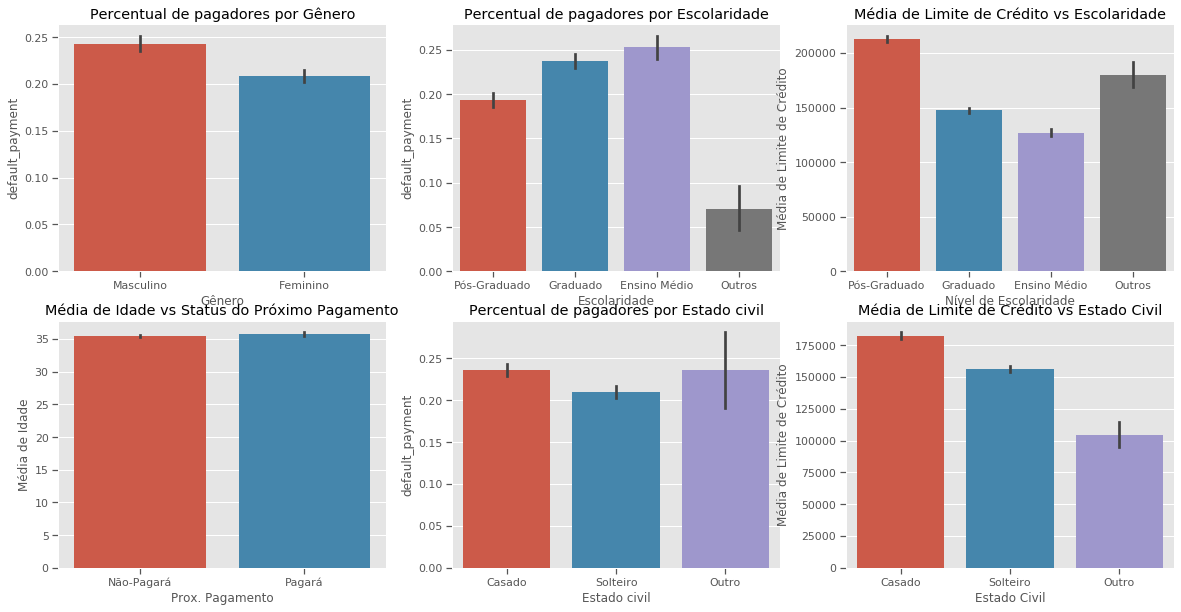

In [1228]:
#plt.figure(figsize=(6,5))
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')

# Figura 1
ax = sns.barplot(x="sex", y="default_payment", data=dfcred,ax=axes[0,0])
ax.set_xticklabels(['Masculino','Feminino'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Gênero')
ax.set_title("Percentual de pagadores por Gênero");

# Figura 2
ax = sns.barplot(x="education", y="default_payment", data=dfcred,ax=axes[0,1])
ax.set_xticklabels(['Pós-Graduado','Graduado','Ensino Médio','Outros'])
ax.set_label('Pagadores')
ax.set_xlabel('Escolaridade')
ax.set_title("Percentual de pagadores por Escolaridade");

# Figura 3
ax = sns.barplot(x="education", y="limit_bal", data=dfcred,ax=axes[0,2])
ax.set_xticklabels(['Pós-Graduado','Graduado','Ensino Médio','Outros'])
ax.set_ylabel('Média de Limite de Crédito')
ax.set_xlabel('Nível de Escolaridade')
ax.set_title('Média de Limite de Crédito vs Escolaridade');

# Figura 4
ax = sns.barplot(x="default_payment", y="age", data=dfcred,ax=axes[1,0])
ax.set_xticklabels(['Não-Pagará','Pagará'])
ax.set_ylabel('Média de Idade')
ax.set_xlabel('Prox. Pagamento')
ax.set_title("Média de Idade vs Status do Próximo Pagamento");

# Figura 5
ax = sns.barplot(x="marriage", y="default_payment", data=dfcred,ax=axes[1,1])
ax.set_xticklabels(['Casado','Solteiro','Outro'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Estado civil')
ax.set_title("Percentual de pagadores por Estado civil");

# Figura 6
ax = sns.barplot(x="marriage", y="limit_bal", data=dfcred,ax=axes[1,2])
ax.set_xticklabels(['Casado','Solteiro','Outro'])
ax.set_ylabel('Média de Limite de Crédito')
ax.set_xlabel('Estado Civil')
ax.set_title('Média de Limite de Crédito vs Estado Civil');

f.savefig('./imagens/fig_AED.png', format='png', dpi= 200)

Na análise dos gráficos acima observa-se:
        - Homens apresentam um percentual de bons-pagadores superior ao de mulheres;
        - Há um menor número de bons-pagadores entre as pessoas de maior escolaridade que entre as pessoas de menor escolaridade;
        - Pessoas com maior escolaridade tem, em média, limite maior que pessoas com menor escolaridade;
        - Não há diferença significativa na média de idade de bons-pagadores e maus-pagadores;
        - Clientes casados apresentam percentual superior de bons-pagadores em relação a clientes solteiros;
        - Clientes casados tem, em média, limite superior a clientes solteiros.

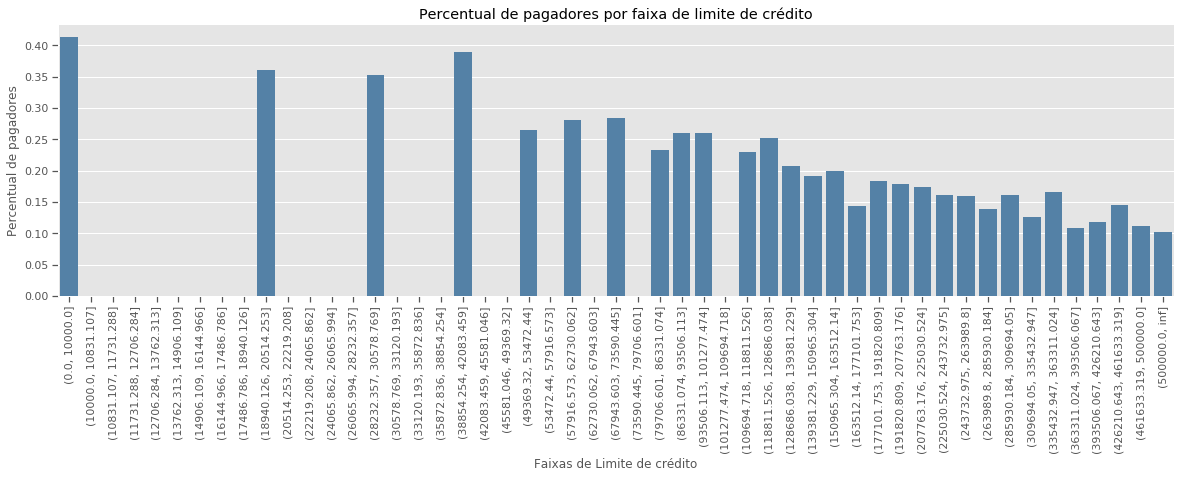

In [1229]:
df = dfcred.copy()
bins = [0] + np.logspace(4,5.69897000434,50).tolist() + [np.inf]
df = df.default_payment.groupby(pd.cut(df['limit_bal'], bins=bins)).mean().reset_index(name='Status Pagamento')

fig2 = plt.figure(figsize=(20,5))
ax = sns.barplot(x="limit_bal", y="Status Pagamento", data=df, color = 'steelblue')
ax.set_xticklabels(df.limit_bal.sort_values().unique(), rotation= 'vertical')
ax.set_ylabel('Percentual de pagadores')
ax.set_xlabel('Faixas de Limite de crédito')
ax.set_title("Percentual de pagadores por faixa de limite de crédito");

fig2.savefig('./imagens/fig_AED2.png', format='png', dpi= 200)

Da análise do gráfico acima percebe-se que clientes que apresentam limite de crédito inferior tem percentual de bons-pagadores superior aos clientes com limite superior.

Observa-se que, entre os clientes com limite superior a 500 mil (cerca de 849 clientes ou 3.11% dos clientes), os bons-pagadores são cerca de 10%.

Isso implica que, se esses maus-pagadores usarem 25% do seu limite, esses 90% de maus-pagadores representam a chance de perder 99,7 milhões. Este valor representa uma perda superior ao limite de crédito de 3917 clientes, com limite inferior a 40 mil (cerca de 14,36% do clientes), que somados representa 92,8 milhões.

### Analise do parâmetro "default_payment"

Isso vai contra o que é esperado de instituições de crédito, que tendem a dar mais crédito a clientes com um perfil de bom pagador. As duas interpretações possíveis acabam então dependendo do parâmetro que indica se o cliente é ou não um bom pagador.

Caso se assuma que o default_payment entregue nos dados está correto, é recomendado a empresa que reavalie a sua forma de análise do limite de crédito dos seus clientes, pois diversos clientes com perfil de mau-pagador acabam tendo a disposição um limite superior a outros com melhor perfil.

Caso se assuma que o default_payment entregue nos dados está incorreto, isso pode ser fruto de erro no banco de dados ou na interpretação inicial do seu significado. Então as análises anteriores se invertem e, por exemplo, na figura acima será observado que clientes com maior limite de crédito também são aqueles com menor percentual de maus-pagadores.

A partir daqui essa análise assume os valores abaixo para a variável default_payment.

**default_payment**: Status do Pagamento da Próxima Fatura
    
        0 = Pagará a próxima fatura;
        1 = Não-Pagará a próxima fatura.

# Análise explanatória dos Dados (default_payment alterado)

In [1230]:
dfcred.default_payment[dfcred.default_payment==0].count()

data_rows = [['Pagará no próximo mês',dfcred.default_payment[dfcred.default_payment==0].count(), round(dfcred.default_payment[dfcred.default_payment==0].count()*100/dfcred.default_payment.count(),2)],
             ['Não pagará no próximo mês', dfcred.default_payment[dfcred.default_payment==1].count(), round(dfcred.default_payment[dfcred.default_payment==1].count()*100/dfcred.default_payment.count(),2)]
            ]

t = Table(rows=data_rows, names=('Status do Pagamento', 'Nº de Clientes','(%) do Total'))
print(t)

   Status do Pagamento    Nº de Clientes (%) do Total
------------------------- -------------- ------------
    Pagará no próximo mês          21219        77.79
Não pagará no próximo mês           6058        22.21


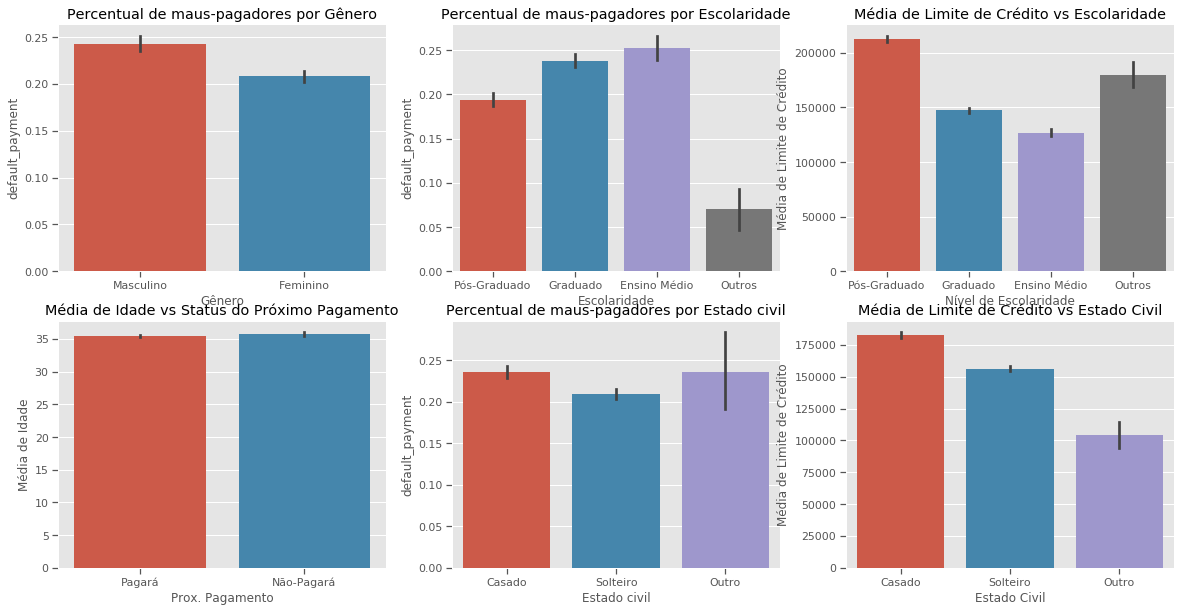

In [1231]:
#plt.figure(figsize=(6,5))
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')

# Figura 1
ax = sns.barplot(x="sex", y="default_payment", data=dfcred,ax=axes[0,0])
ax.set_xticklabels(['Masculino','Feminino'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Gênero')
ax.set_title("Percentual de maus-pagadores por Gênero");

# Figura 2
ax = sns.barplot(x="education", y="default_payment", data=dfcred,ax=axes[0,1])
ax.set_xticklabels(['Pós-Graduado','Graduado','Ensino Médio','Outros'])
ax.set_label('Pagadores')
ax.set_xlabel('Escolaridade')
ax.set_title("Percentual de maus-pagadores por Escolaridade");

# Figura 3
ax = sns.barplot(x="education", y="limit_bal", data=dfcred,ax=axes[0,2])
ax.set_xticklabels(['Pós-Graduado','Graduado','Ensino Médio','Outros'])
ax.set_ylabel('Média de Limite de Crédito')
ax.set_xlabel('Nível de Escolaridade')
ax.set_title('Média de Limite de Crédito vs Escolaridade');

# Figura 4
ax = sns.barplot(x="default_payment", y="age", data=dfcred,ax=axes[1,0])
ax.set_xticklabels(['Pagará','Não-Pagará'])
ax.set_ylabel('Média de Idade')
ax.set_xlabel('Prox. Pagamento')
ax.set_title("Média de Idade vs Status do Próximo Pagamento");

# Figura 5
ax = sns.barplot(x="marriage", y="default_payment", data=dfcred,ax=axes[1,1])
ax.set_xticklabels(['Casado','Solteiro','Outro'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Estado civil')
ax.set_title("Percentual de maus-pagadores por Estado civil");

# Figura 6
ax = sns.barplot(x="marriage", y="limit_bal", data=dfcred,ax=axes[1,2])
ax.set_xticklabels(['Casado','Solteiro','Outro'])
ax.set_ylabel('Média de Limite de Crédito')
ax.set_xlabel('Estado Civil')
ax.set_title('Média de Limite de Crédito vs Estado Civil');

f.savefig('./imagens/fig_AED.png', format='png', dpi= 200)

Na análise dos gráficos acima observa-se:
        - Homens apresentam um percentual de maus-pagadores superior ao de mulheres;
        - Há um menor número de maus-pagadores entre as pessoas de maior escolaridade que entre as pessoas de menor escolaridade;
        - Pessoas com maior escolaridade tem, em média, limite maior que pessoas com menor escolaridade;
        - Não há diferença significativa na média de idade de bons-pagadores e maus-pagadores;
        - Clientes casados apresentam percentual superior de maus-pagadores em relação a clientes solteiros;
        - Clientes casados tem, em média, limite superior a clientes solteiros.

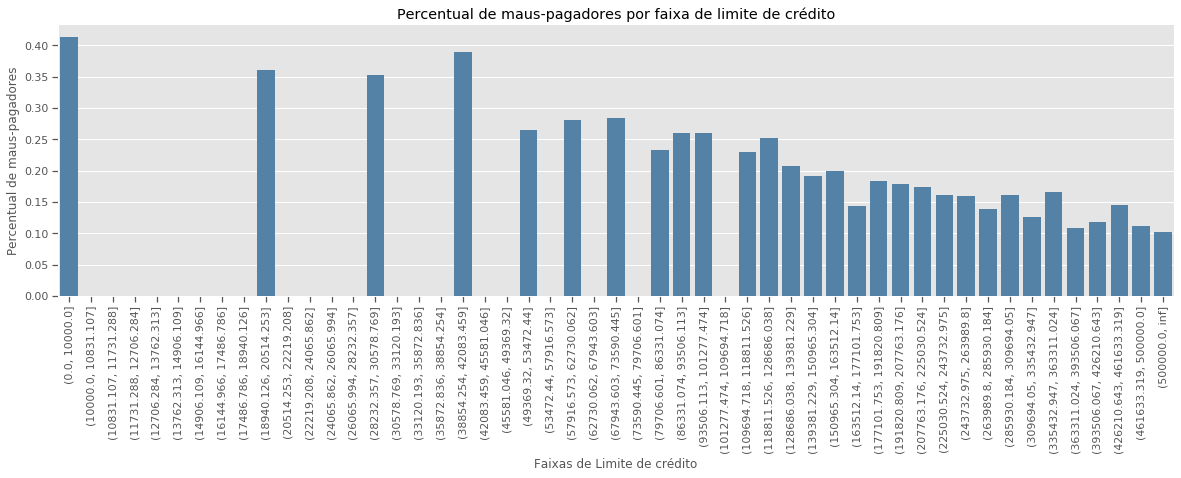

In [1232]:
df = dfcred.copy()
bins = [0] + np.logspace(4,5.69897000434,50).tolist() + [np.inf]
df = df.default_payment.groupby(pd.cut(df['limit_bal'], bins=bins)).mean().reset_index(name='Status Pagamento')

fig2 = plt.figure(figsize=(20,5))
ax = sns.barplot(x="limit_bal", y="Status Pagamento", data=df, color = 'steelblue')
ax.set_xticklabels(df.limit_bal.sort_values().unique(), rotation= 'vertical')
ax.set_ylabel('Percentual de maus-pagadores')
ax.set_xlabel('Faixas de Limite de crédito')
ax.set_title("Percentual de maus-pagadores por faixa de limite de crédito");

fig2.savefig('./imagens/fig_AED2.png', format='png', dpi= 200)

**Obs:** Da análise do gráfico acima percebe-se que clientes que apresentam limite de crédito inferior tem percentual de maus-pagadores superior aos clientes com limite superior.

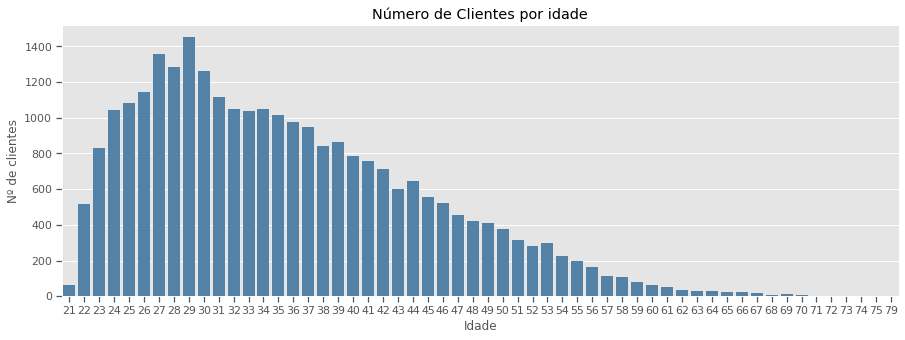

In [1233]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'age', color="steelblue", data= dfcred)
plt.ylabel('Nº de clientes')
plt.xlabel('Idade')
plt.title("Número de Clientes por idade");

# Preparação dos dataframes de treino e teste

- Padronização dos dados (Provavelmente usando StandardScale)

In [1234]:
X = dfcred.drop('default_payment', axis=1)  
y = dfcred['default_payment']
scaler = StandardScaler()
print(scaler.fit(X))

x_std = scaler.transform(X)
X_std = pd.DataFrame(x_std,
                     index= dfcred.index,
                     columns= dfcred.columns[:-1])

dfcred_std = pd.concat([X_std, y], axis=1)

StandardScaler(copy=True, with_mean=True, with_std=True)


- Redução de dimensões (PCA)

In [1235]:
pca = PCA(n_components=3)
print(pca.fit(X))
print('Variância Total das 3 componentes: {} %'.format(round(sum(pca.explained_variance_ratio_)*100,2)))

x_pca = pca.transform(X)
X_pca = pd.DataFrame(x_pca)

dfcred_pca = pd.concat([X_pca, y], axis=1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


- Split dos dados

In [1236]:
# Split dados padrão
X = dfcred.drop('default_payment', axis=1)  
y = dfcred['default_payment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# Split dados standalized
X_std = dfcred_std.drop('default_payment', axis=1)  
y_std = dfcred_std['default_payment']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std,y_std, test_size=0.2, stratify=y_std, random_state=42)

# Split dados pós-PCA

X_pca = dfcred_pca.drop('default_payment', axis=1)  
y_pca = dfcred_pca['default_payment']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca, test_size=0.2, stratify=y_pca, random_state=42)

# Modelo de Classificação
 - Logistic Regression
 - Decision Tree
 - Random Forest

# Logistic Regression (Padrão)
- Treino do modelo (RandonizeSearchCV)
- Uso do modelo
- Visualização das métricas

### Treino do Modelo

### Uso do Modelo

In [1237]:
LR = LogisticRegression(C=4.4737, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print('Acurácia:', accuracy_score(y_pred,y_test))

Acurácia: 0.7774926686217009


### Visualização das métricas

In [1238]:
## 5-fold cross-validation 
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Acurácia média (CV = 5): {}".format(round(np.mean(cv_scores),4)),
      ", desvio padrão: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4244
           1       0.00      0.00      0.00      1212

    accuracy                           0.78      5456
   macro avg       0.39      0.50      0.44      5456
weighted avg       0.61      0.78      0.68      5456


Acurácia média (CV = 5): 0.7778 , desvio padrão: 0.0001


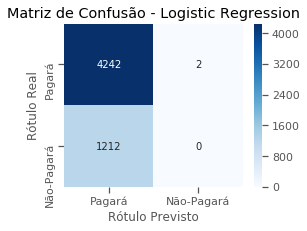

In [1239]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Pagará', 'Não-Pagará'], 
            yticklabels = ['Pagará', 'Não-Pagará'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.title("Matriz de Confusão - Logistic Regression");

# Logistic Regression (STD)
- Treino do modelo (RandonizeSearchCV)
- Uso do modelo
- Visualização das métricas

### Treino do Modelo

### Uso do Modelo

In [1240]:
LR_std = LogisticRegression(C=4.7368, random_state=0)
LR_std.fit(X_train_std, y_train_std)
y_pred_std = LR_std.predict(X_test_std)

print('Acurácia:', accuracy_score(y_pred_std,y_test_std))

Acurácia: 0.811400293255132


### Visualização das métricas

In [1241]:
## 5-fold cross-validation 
cv_scores_std = cross_val_score(LR_std, X_std, y_std, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test_std, y_pred_std))
print()
print("Acurácia média (CV = 5): {}".format(round(np.mean(cv_scores_std),4)),
      ", desvio padrão: {}".format(round(np.std(cv_scores_std),4)))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4244
           1       0.72      0.25      0.37      1212

    accuracy                           0.81      5456
   macro avg       0.77      0.61      0.63      5456
weighted avg       0.80      0.81      0.77      5456


Acurácia média (CV = 5): 0.8108 , desvio padrão: 0.0052


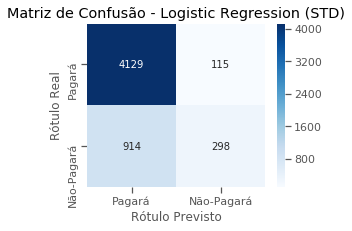

In [1242]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_std,LR_std.predict(X_test_std))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Pagará', 'Não-Pagará'], 
            yticklabels = ['Pagará', 'Não-Pagará'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.title("Matriz de Confusão - Logistic Regression (STD)");

# Logistic Regression (STD + PCA)
- Treino do modelo (RandonizeSearchCV)
- Uso do modelo
- Visualização das métricas

### Treino do Modelo

### Uso do Modelo

In [1243]:
LR_pca = LogisticRegression(C=4.7368, random_state=0)
LR_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = LR_pca.predict(X_test_pca)

print('Acurácia:', accuracy_score(y_pred_pca,y_test_pca))

Acurácia: 0.7778592375366569


### Visualização das métricas

In [1244]:
## 5-fold cross-validation 
cv_scores_pca = cross_val_score(LR_pca, X_pca, y_pca, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test_pca, y_pred_pca))
print()
print("Acurácia média (CV = 5): {}".format(round(np.mean(cv_scores_pca),4)),
      ", desvio padrão: {}".format(round(np.std(cv_scores_pca),4)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4244
           1       0.00      0.00      0.00      1212

    accuracy                           0.78      5456
   macro avg       0.39      0.50      0.44      5456
weighted avg       0.61      0.78      0.68      5456


Acurácia média (CV = 5): 0.7779 , desvio padrão: 0.0001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


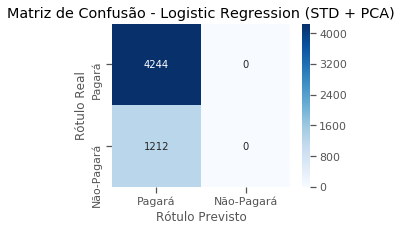

In [1245]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_pca,LR_pca.predict(X_test_pca))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Pagará', 'Não-Pagará'], 
            yticklabels = ['Pagará', 'Não-Pagará'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.title("Matriz de Confusão - Logistic Regression (STD + PCA)");

# Decision Tree
- Treino do modelo (RandonizeSearchCV)
- Uso do modelo
- Visualização das métricas

### Treino do Modelo

### Uso do Modelo

In [1246]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Acurácia:', accuracy_score(y_pred,y_test))

Acurácia: 0.8123167155425219


### Visualização das métricas

In [1247]:
## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Acurácia média (CV = 5): {}".format(round(np.mean(cv_scores),4)), 
      ", desvio padrão: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4244
           1       0.67      0.30      0.42      1212

    accuracy                           0.81      5456
   macro avg       0.75      0.63      0.65      5456
weighted avg       0.79      0.81      0.78      5456


Acurácia média (CV = 5): 0.8122 , desvio padrão: 0.0095


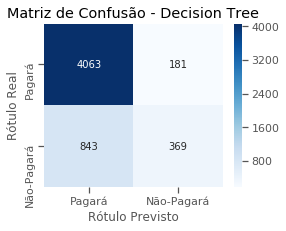

In [1248]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Pagará', 'Não-Pagará'], 
            yticklabels = ['Pagará', 'Não-Pagará'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.title("Matriz de Confusão - Decision Tree");

# Random Forest
- Treino do modelo (RandonizeSearchCV)
- Uso do modelo
- Visualização das métricas

### Treino do Modelo

### Uso do Modelo

In [1249]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Acurácia:', accuracy_score(y_pred,y_test))

Acurácia: 0.8231304985337243


### Visualização das métricas

In [1250]:
## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Acurácia média (CV = 5): {}".format(round(np.mean(cv_scores),4)),
      ", desvio padrão: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4244
           1       0.70      0.35      0.47      1212

    accuracy                           0.82      5456
   macro avg       0.77      0.66      0.68      5456
weighted avg       0.81      0.82      0.80      5456


Acurácia média (CV = 5): 0.8205 , desvio padrão: 0.0097


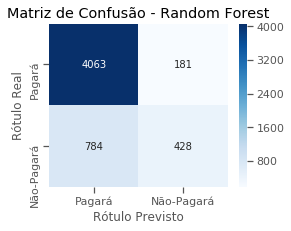

In [1251]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Pagará', 'Não-Pagará'], 
            yticklabels = ['Pagará', 'Não-Pagará'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.title("Matriz de Confusão - Random Forest");

# Resultado final de todos os modelos

In [1252]:
# Append different models
models = []

# Logistic Regression
models.append(('Logistic Regression (Padrão)',
               LogisticRegression(C=4.4737, random_state=0),'none'))

# Logistic Regression (with standardized data)
models.append(('Logistic Regression (Std)',
               LogisticRegression(C=4.7368, random_state=0),'std'))

# Logistic Regression with standardized and important features
models.append(('Logistic Regression (Std+PCA)',
               LogisticRegression(C=4.7368, random_state=0),'pca'))

# Decision Tree
models.append(('Decision Tree (Padrão)', 
              DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest (Padrão)', 
              RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

# Evaluate each model
results = []
names = []
scoring = ['accuracy', 'recall', 'roc_auc']
cv = 5

for name, model, Std in models:
    if Std == 'std':
        cv_results = cross_validate(model, X_std, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Feito' % (name)
        print(msg)
    elif Std == 'none':
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Feito' % (name)
        print(msg)
    else:
        cv_results = cross_validate(model, X_pca, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Feito' % (name)
        print(msg)

Logistic Regression (Padrão): Feito
Logistic Regression (Std): Feito
Logistic Regression (Std+PCA): Feito
Decision Tree (Padrão): Feito
Random Forest (Padrão): Feito


In [1253]:
results_acurracy = [results[i]['test_accuracy'] for i in range(0,5)]
results_recall = [results[i]['test_recall'] for i in range(0,5)]
results_roc_auc = [results[i]['test_roc_auc'] for i in range(0,5)]

In [1254]:
data_rows = [[models[i][0][:models[i][0].find('(')].strip(),
              models[i][0][models[i][0].find('(')+1:models[i][0].find(')')].strip(),
              round(results_acurracy[i].mean(),4),
              round(results_recall[i].mean(),4),
              round(results_roc_auc[i].mean(),4)
             ] for i in range(0,5)]   

t = Table(rows=data_rows, names=('Model', 'Data', 'Acurácia', 'Recall', 'AUC'))
print(t)

       Model          Data  Acurácia Recall  AUC  
------------------- ------- -------- ------ ------
Logistic Regression  Padrão   0.7778 0.0002  0.656
Logistic Regression     Std   0.8108 0.2461 0.7247
Logistic Regression Std+PCA   0.7779    0.0 0.6261
      Decision Tree  Padrão   0.8122 0.3226 0.7431
      Random Forest  Padrão   0.8205 0.3546 0.7764


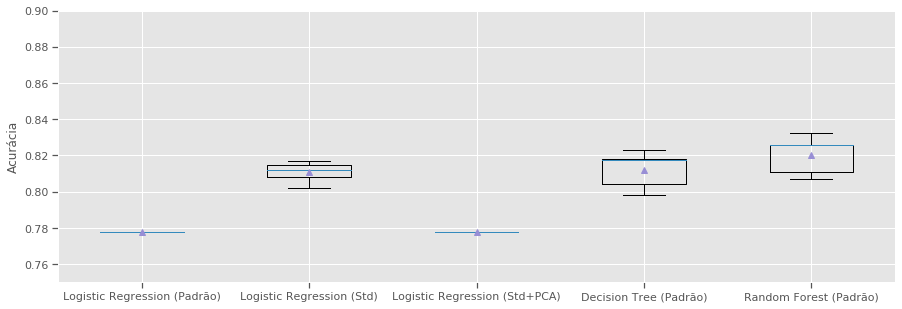

In [1255]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_acurracy, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Acurácia')
ax.set_ylim([0.75,0.9])

# Save the figure
fig.savefig('./imagens/fig_acuracia.png', bbox_inches='tight')

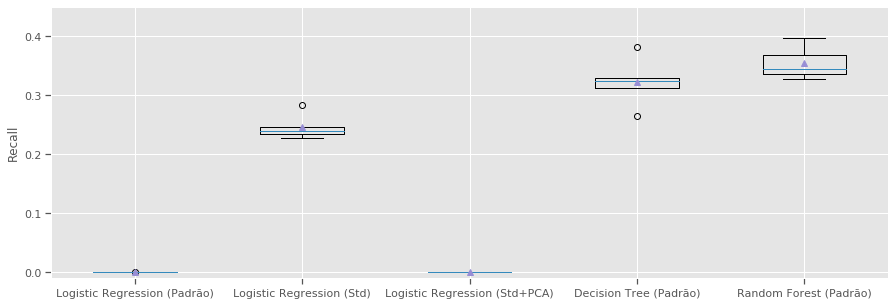

In [1256]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_recall, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Recall')
ax.set_ylim([-0.01, 0.45])

# Save the figure
fig.savefig('./imagens/fig_recall.png', bbox_inches='tight')

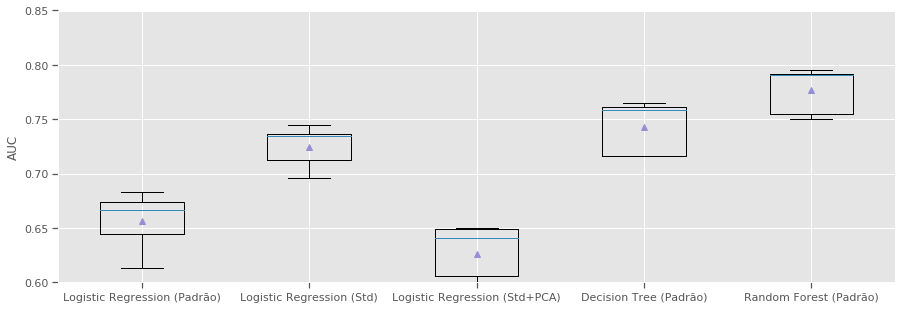

In [1257]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_roc_auc, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('AUC')
ax.set_ylim([0.6, 0.85])

# Save the figure
fig.savefig('./imagens/fig_roc_auc.png', bbox_inches='tight')

# Uso do modelo escolhido

Modelo escolhido foi o DecisionTree, como explicado no início do case foram levados em consideração três parâmetros para a escolha: Acurácia, Recall e AUC. Os modelos DecisionTree, RandomForest e LogiscticRegression (Std) apresentaram valores bem próximo nestes três aspectos.

DecisionTree, no entanto, apresentou menor variáção entre as execuções realizadas no valor do Recall. Com todos os outros parâmetros próximos, este acabou sendo ponto de decisão. 

In [1258]:
dfcred_validation = pd.read_csv('../bases/questao33_creditcard_clientes.csv',
                    encoding='utf-8',
                    sep=';',
                    header= 1)

nclientes = int(round(dfcred_validation.shape[0]*10/100, 0))
nclientes

272

In [1259]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X, y)
y_pred = Tree.predict_proba(dfcred_validation)
Y_pred = pd.DataFrame(y_pred[:,1],
                     index= dfcred_validation.index,
                     columns= ['predict'])

clientes = Y_pred.sort_values(by=['predict'],ascending= False).head(nclientes)
clientes.reset_index(inplace= True)
clientes.columns = ['ID_Cliente', 'Chance de inadimplência (%)']
clientes.to_excel('clientes_cobrar.xlsx',index= False)
clientes

,ID_Cliente,Chance de inadimplência (%)
0,2607,1.000000
1,994,1.000000
2,259,1.000000
3,2207,1.000000
4,0,0.965517
...,...,...
267,1950,0.500000
268,2088,0.500000
269,2699,0.496350
270,1909,0.496350
